# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



# Years distribution of candidates

The boxplot below shows the distribution of age within each of the parties

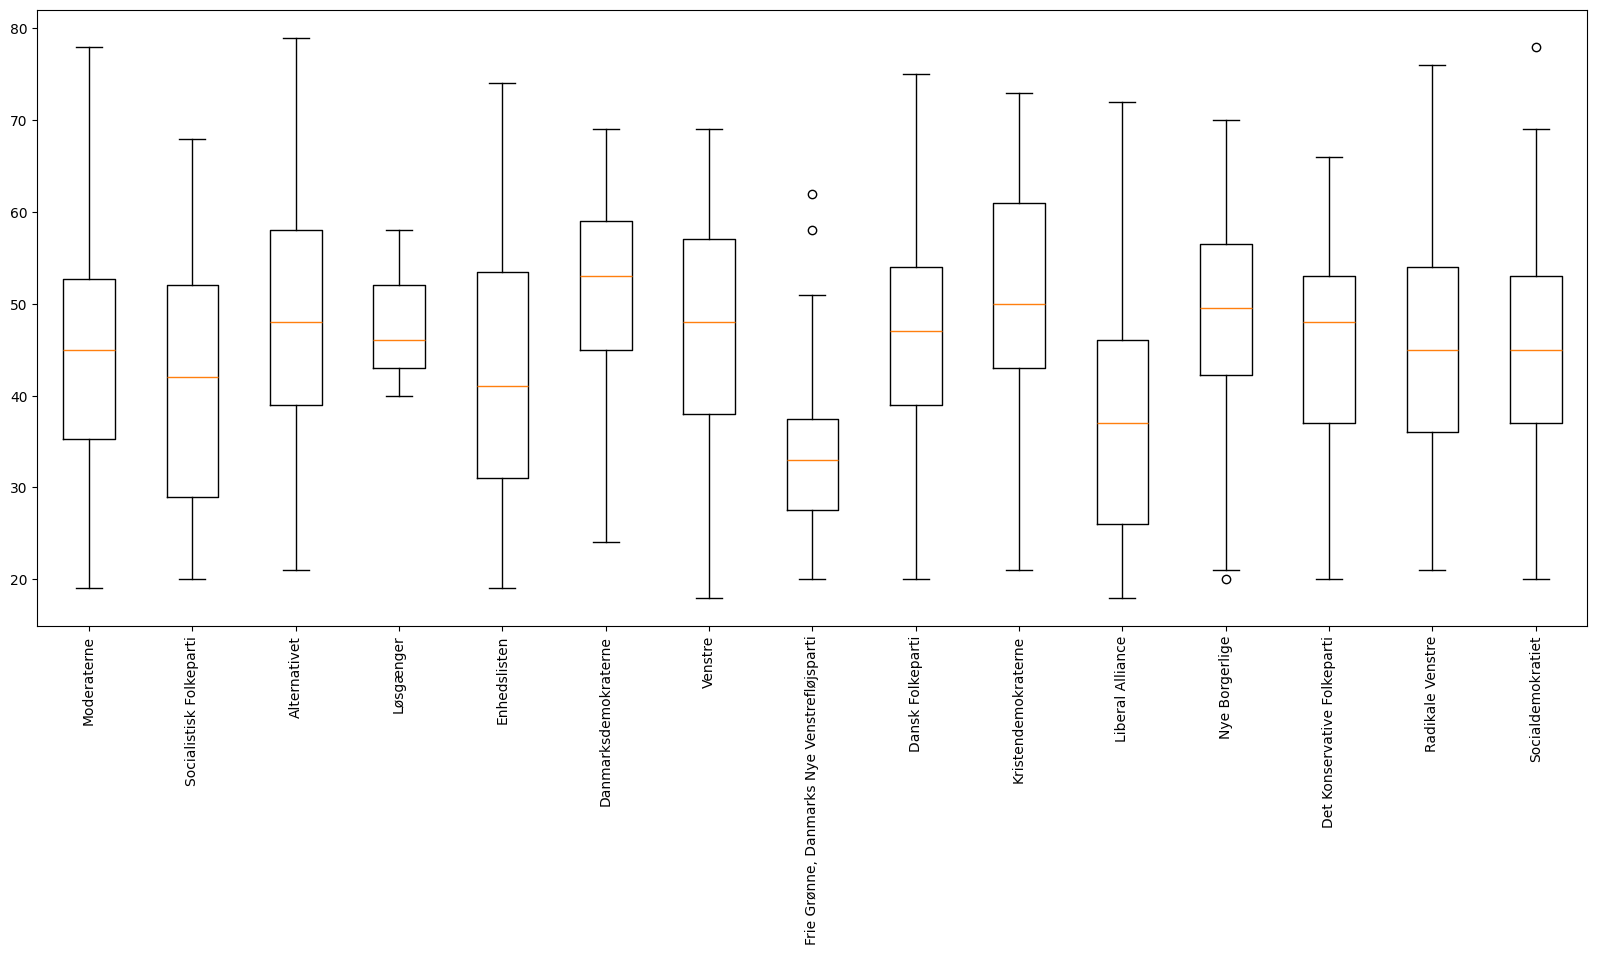

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#first one
data = pd.read_excel('alldata.xlsx')

age_data = data[data['alder'] > 0]
parties = data['parti'].unique()

plt.figure(figsize =(20, 8))
plt.xticks(rotation=90)
plt.boxplot([age_data[age_data['parti'] == party]['alder'] for party in parties], tick_labels=parties)
plt.show()

# Most confident candidates
The most confident canidates are shown in the graph below. They are calculated based on a simple count of all answers with a value of -2 or 2. The first 30 candidates with the highest count are plotted on the graph.

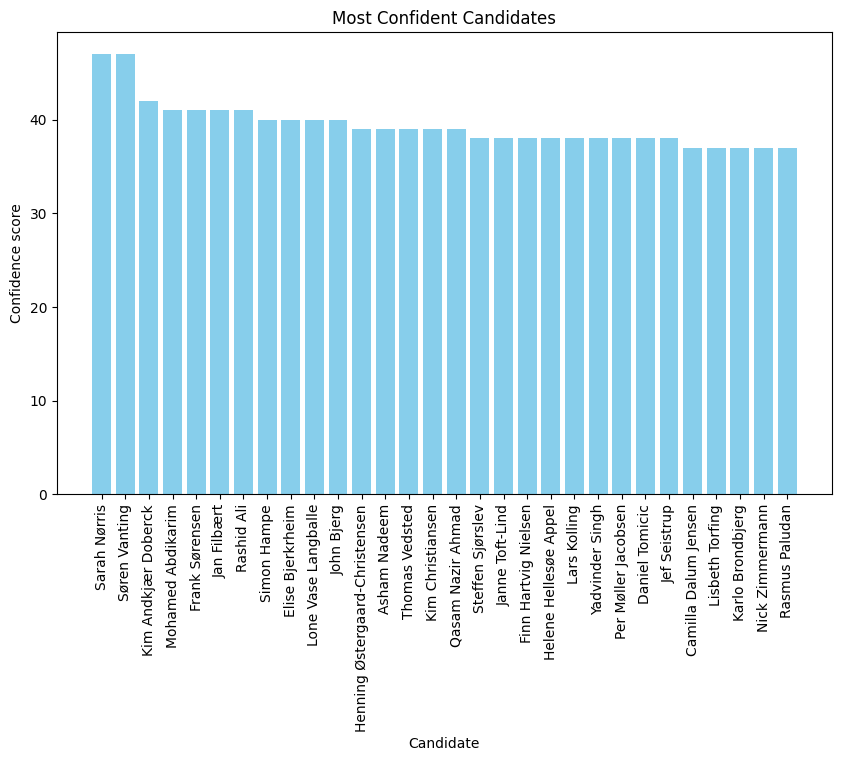

In [2]:
#second one
columns_to_select = []

numbers_to_exclude = ['532', '536', '539', '542', '549', '554', '558', '560']
for i in range(530, 561):
    col_name = str(i)
    if col_name not in numbers_to_exclude and col_name in data.columns:
        columns_to_select.append(col_name)
    elif col_name in numbers_to_exclude:
        continue
        
for i in range(1, 13):
    columns_to_select.append(str(i) + 'a')
    columns_to_select.append(str(i) + 'b')

navn = data['navn']
question_data = data[columns_to_select]
most_confident = data.copy()
most_confident["confidence_score"] = (question_data == -2).sum(axis=1) + (question_data == 2).sum(axis=1)
most_confident = most_confident[["navn", "confidence_score"]].sort_values(by="confidence_score", ascending=False)
most_confident = most_confident.head(30)

plt.figure(figsize=(10,6))
plt.bar(most_confident["navn"], most_confident["confidence_score"], color="skyblue")

plt.title("Most Confident Candidates")
plt.xlabel("Candidate")
plt.ylabel("Confidence score")
plt.xticks(rotation=90)
plt.show()

# Party disagreements

## Intra party
The first list we see is top 10 highest stds of candidates within the same party. Meaning that it is representative of the most internally disagreeing parties. Løsgænger are first with 1.475.

## Inter party
The second heatmap shows a difference of each party compared to all other parties. Best way to visualize it is a heatmap, showing the average difference in answers between all canidadtes of two parties.
At the end the party with the highest average between all parties is the one that disagrees the most with everyone. That is Enhendslisten with 1.42 average difference.


parti
Løsgænger                      1.475090
Kristendemokraterne            1.031068
Alternativet                   0.922496
Moderaterne                    0.875018
Det Konservative Folkeparti    0.872114
Dansk Folkeparti               0.865991
Radikale Venstre               0.849890
Socialdemokratiet              0.831597
Venstre                        0.826212
Liberal Alliance               0.721745
dtype: float64


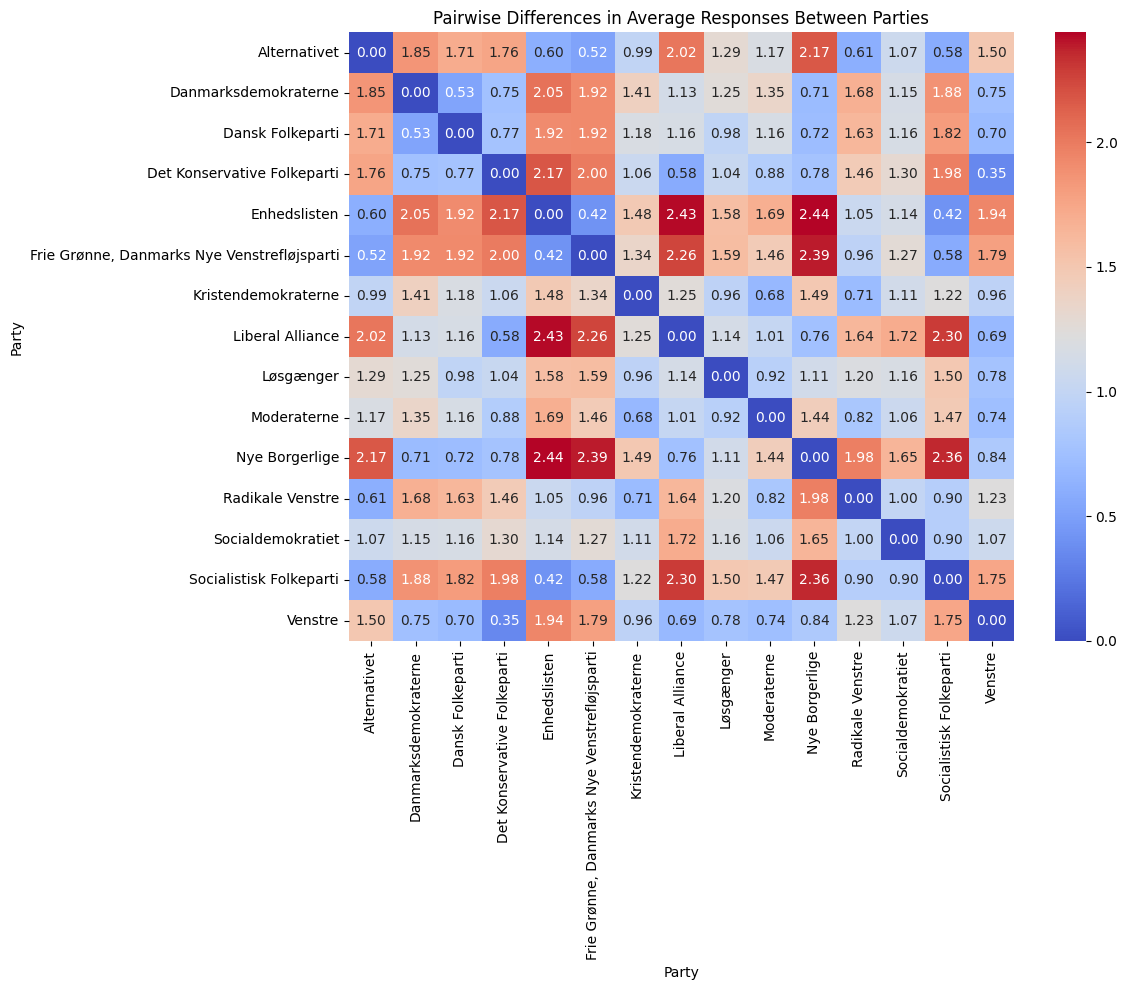


Party with most deviation from all other parties: Enhedslisten with 1.4219463243349049


In [3]:
#third one
party_std = data.groupby('parti')[columns_to_select].std()
average_std = party_std.mean(axis=1)
most_disagreeing_party = average_std.idxmax()
top_10_disagreeing_parties = average_std.nlargest(10)
party_averages = data.groupby('parti')[columns_to_select].mean()
print(top_10_disagreeing_parties)

pairwise_differences = pd.DataFrame(index=party_averages.index, columns=party_averages.index)
num_parties = len(party_averages.index)
for party1 in party_averages.index:
    for party2 in party_averages.index:
        pairwise_differences.loc[party1, party2] = np.mean(np.abs(party_averages.loc[party1] - party_averages.loc[party2]))

plt.figure(figsize=(12, 10))
sns.heatmap(pairwise_differences.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Differences in Average Responses Between Parties")
plt.xlabel("Party")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

average_deviation = pairwise_differences.mean()
most_deviant_party = average_deviation.idxmax()
print(f"\nParty with most deviation from all other parties: {most_deviant_party} with {average_deviation[most_deviant_party]}")

# Party prediction models
The snippet below shows how three different models score in predicting the party that a certain candidate belongs to. There is a Decision Tree, Random Forest and Gradiant Boosted Trees classifiers.
The features used are all the questions answered by each candidate and the predicted value is the party

In [7]:
# four
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_excel('alldata.xlsx')
df = df.drop(['storkreds', 'alder', 'navn'], axis=1)

label_encoder = LabelEncoder()
df['parti'] = label_encoder.fit_transform(df['parti'])

X = df.drop('parti', axis=1)
y = df['parti']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=6, random_state=0)
clf.fit(X_train, y_train)

print("Decision tree training accuracy:", clf.score(X_train, y_train))
print("Decision tree testing accuracy:", clf.score(X_test, y_test))

forest = RandomForestClassifier(n_estimators=100, max_depth=4, 
                                max_features=10, random_state=0)
forest.fit(X_train, y_train)

print("Random forest accuracy on training set: {}".format(forest.score(X_train, y_train)))
print("Random forest accuracy on test set: {}".format(forest.score(X_test, y_test)))

gbt = GradientBoostingClassifier(random_state=20, n_estimators=200,
                             max_depth=6, learning_rate=0.3)
gbt.fit(X_train, y_train)

print("Gradient boosted tree accuracy on training set: {}".format(gbt.score(X_train, y_train)))
print("Gradient boosted tree accuracy on test set: {}".format(gbt.score(X_test, y_test)))

Decision tree training accuracy: 0.8354978354978355
Decision tree testing accuracy: 0.7528735632183908
Random forest accuracy on training set: 0.9033189033189033
Random forest accuracy on test set: 0.867816091954023
Gradient boosted tree accuracy on training set: 1.0
Gradient boosted tree accuracy on test set: 0.8275862068965517
